## Import


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Dataset and pattern

In [55]:
iris = pd.read_csv('iris.csv')
X = iris.iloc[:,1:5].to_numpy()#pattern
Lable = iris.iloc[:,0].to_numpy()
Y = []#target

for i in Lable:
    if (i == 'Iris-setosa'):
        Y.append(1)
    elif (i == 'Iris-versicolor'):
        Y.append(2)
    else:
        Y.append(3)

## Activation Function 

In [56]:
def act_func(n):
    
    if n < 0:
        return -1
    elif n >= 0:
        return 1
    else:
        return 0

In [57]:
def sing_Neu(x, y, alpha):     
    w = [0,0,0,0]
    weight = np.matrix(w)
    bias = np.matrix([0])
    temp_error = []

    #1. pattern and target
    for pattern, target in zip(x, y):
        pattern = np.matrix(pattern)
        target = np.matrix(target)
        net = weight * pattern.T + bias
        
         #2. a = f(net) 
        ao = act_func(net)#actual output

        #3. Error = t-yin
        error = (target - ao).tolist()[0][0]
        temp_error.append(error)
       
        #4. modify the weight
        if error < 0:
            weight = weight - alpha * pattern
            bias = bias - alpha * error
            
        elif error > 0:
            weight = weight + alpha * pattern
            bias = bias + alpha * error
            
        elif error == 0:
            weight = weight
            bias = bias
            
    return temp_error

## Main function

In [58]:
def main():     
    
    plt.ion()
    plt.figure(1)
    sse_list = []
    alpha = 0.5
    
    for i in range(0,20):
          
        error_list = sing_Neu(X,Y,alpha)
        sse_list.append((np.matrix(error_list) * np.matrix(error_list).T).tolist()[0][0])
        
        plt.subplot(111)
        plt.plot(sse_list, 'g.-')
        plt.grid(True)
        plt.pause(0.01)
        plt.draw()     

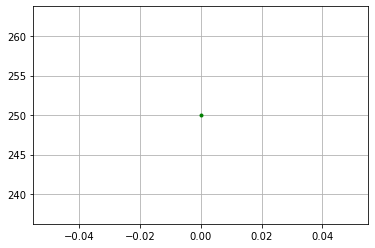

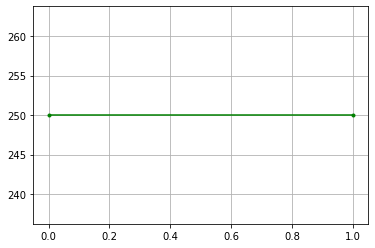

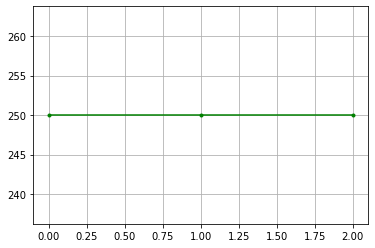

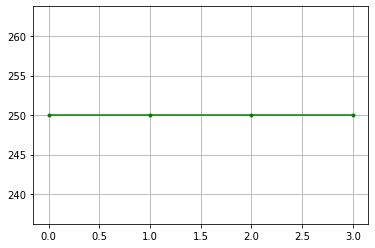

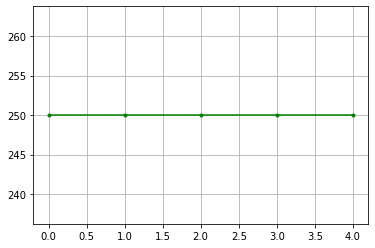

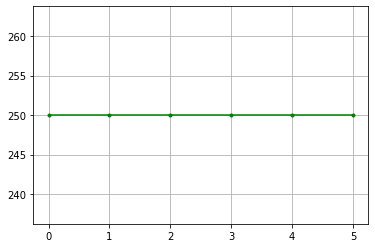

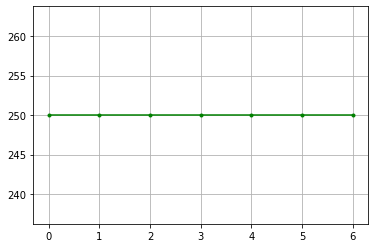

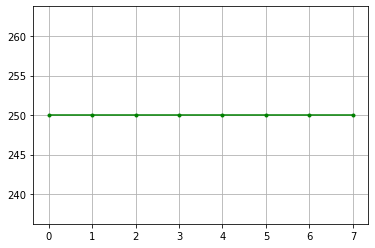

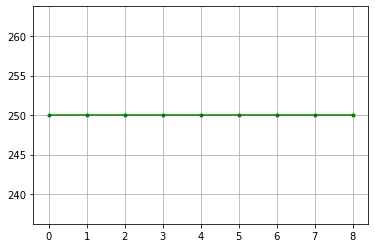

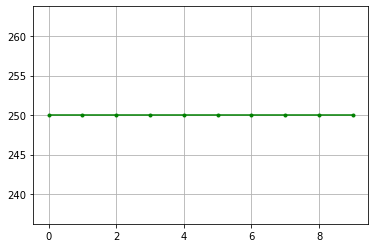

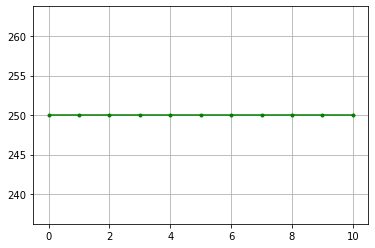

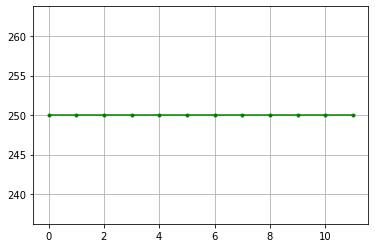

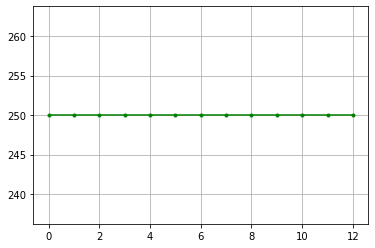

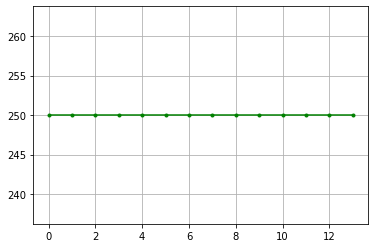

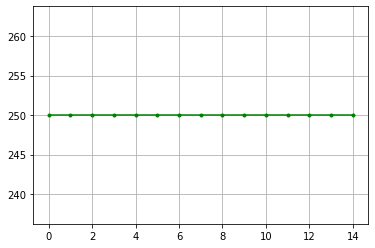

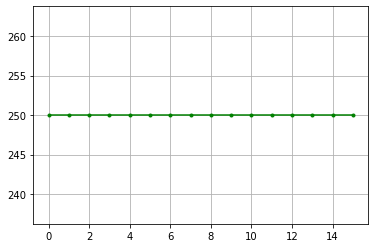

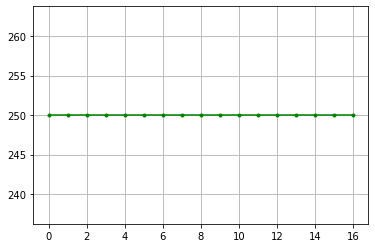

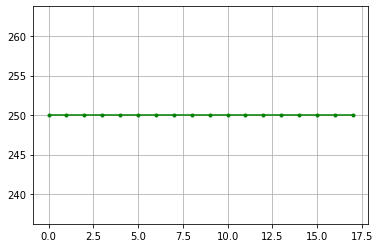

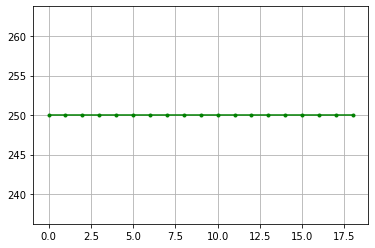

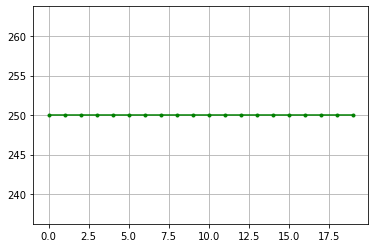

<Figure size 432x288 with 0 Axes>

In [59]:
main()